In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import datasets
from codetrace.type_inf_exp.build_dataset import *
from codetrace.interp_utils import *
from codetrace.interp_vis import *
from nnsight import LanguageModel
import json
from tqdm import tqdm
import json
from transformers import AutoModelForCausalLM
from circuitsvis.logits import token_log_probs

In [11]:
ds = datasets.load_from_disk("exp_data/44/steering_results_ds")
for ex in ds:
    print(ex["fim_program"])

export class Mail {
  public mailId;
  public mailFrom;
  public subject;
  public body;
  public time;
  public isRead;
  public isImportant;
  public hasAttachment;
  public hasImage;
  public imagePath;
  public imageText;
  public imageClass;
  public mailType;
  public hasLabel;
  public labelType;
  public labelClass;
  public isDefault;

  constructor(ldzbpx, zitjvzie, sgisxbb, mugh, ruhl, ouxhvn,
    eybiynxrunk, bsfmqpkapyzao, hsezaoff, nsqpcsmfu, rpzycsepa, yzhzkqpjbv,
    voreefql, vnquksts, titzamwuo, angnvxhzag, wkirbegyb) {

    this.mailId = ldzbpx;
    this.mailFrom = zitjvzie;
    this.subject = sgisxbb;
    this.body = mugh;
    this.time = ruhl;
    this.isRead = ouxhvn;
    this.isImportant = eybiynxrunk;
    this.hasAttachment = bsfmqpkapyzao;
    this.hasImage = hsezaoff;
    this.imagePath = nsqpcsmfu;
    this.imageText = rpzycsepa;
    this.imageClass = yzhzkqpjbv;
    this.mailType = voreefql;
    this.hasLabel = vnquksts;
    this.labelType = titzamwuo;
    t

In [2]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("/home/arjun/models/starcoderbase-1b")

In [3]:
ds = datasets.load_dataset("franlucc/ts-typeinf-1tok-completions", split="train")
ds = ds.filter(lambda x: "<FILL>" in x["fim_program"] and x["correct"])

Filter:   0%|          | 0/20000 [00:00<?, ? examples/s]

In [4]:
prompts = [placeholder_to_std_fmt(x["fim_program"], STARCODER_FIM) for x in ds]
labels = [x["fim_type"] for x in ds]


In [5]:
model_name = "/home/arjun/models/starcoderbase-1b"
model = LanguageModel(model_name, device_map="cuda:2")
model

GPTBigCodeForCausalLM(
  (transformer): GPTBigCodeModel(
    (wte): Embedding(49152, 2048)
    (wpe): Embedding(8192, 2048)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPTBigCodeBlock(
        (ln_1): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (attn): GPTBigCodeSdpaAttention(
          (c_attn): Linear(in_features=2048, out_features=2304, bias=True)
          (c_proj): Linear(in_features=2048, out_features=2048, bias=True)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (mlp): GPTBigCodeMLP(
          (c_fc): Linear(in_features=2048, out_features=8192, bias=True)
          (c_proj): Linear(in_features=8192, out_features=2048, bias=True)
          (act): PytorchGELUTanh()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((2048,), ep

In [6]:
import torch
from copy import deepcopy
decoder = torch.load("models/model_final.pt")
weight = decoder["weight"]
linear_layer = torch.nn.Linear(in_features=weight.shape[1], out_features=weight.shape[0])
linear_layer.weight.data = weight
decoder = linear_layer.to("cpu")

llm = AutoModelForCausalLM.from_pretrained(model_name)
original_lf = deepcopy(llm.transformer.ln_f)
original_head = deepcopy(llm.lm_head)
def original_decoder(x):
    return original_head(original_lf(x))
del(llm)
original_decoder

<function __main__.original_decoder(x)>

In [7]:
k=30
delta = 5
l = 16
out, activations, logits = custom_lens(model, decoder, prompts[k:k+delta], l, "<fim_suffix>")
out_original, _,_ = custom_lens(model, original_decoder, prompts[k:k+delta], l, "<fim_suffix>", activations)
print("gold:", labels[k:k+delta])
print("decode:", out)
print("original:", out_original)
# assert out != out_original

for i,p in enumerate(prompts[k:k+delta]):
    gold = labels[k+i]
    decoded = out[i]
    # if decoded != gold:
    print(std_to_placeholder_fmt(p, STARCODER_FIM))
    print("gold:", gold)
    print("decoded:", decoded)
    print("original:", out_original[i])
    print("="*100)

# activations = collect_hidden_states(model,prompts[k],layers=[l])
# logits = decoder(activations.detach().cpu()).softmax(dim=-1).log().squeeze(0,1)
# print(logits.shape)
# predictions = [model.tokenizer.decode(t) for t in logits.argmax(-1)]
# print(predictions[-1])
# tokenizer.pad_token = tokenizer.eos_token
# # print(dir(tokenizer))
# indices = tokenizer.batch_encode_plus([prompts[k]], return_tensors="pt", padding=True)
# print(indices.input_ids.shape, logits.shape)

# def to_string(x):
#     s =  tokenizer.decode([x])
#     if s in ["<fim_prefix>", "<fim_suffix>", "<fim_middle>"]:
#         s = "*" + s[1:-1] + "*"
#     return s


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


gold: ['string', 'number', 'string', 'string', 'string']
decode: ['string', 'number', 'any', 'boolean', 'any']
original: [' {', ' {', ' {', ' }', '\n     ']
let objToString = Object.prototype.toString;

let baseUID = 0;


export function isObject(value) {
    
    
    let type = typeof value;
    return type === 'function' || (!!value && type === 'object');
}


export function isArray(value) {
    return objToString.call(value) === '[object Array]';
}


export function isFunction(value) {
    return typeof value === 'function';
}


export function isString(value) {
    return objToString.call(value) === '[object String]';
}


export function isNumber(value) {
    return objToString.call(value) === '[object Number]';
}


export function isBoolean(value) {
    return objToString.call(value) === '[object Boolean]';
}


export function isDom(value) {
    return typeof value === 'object'
        && typeof value.nodeType === 'number'
        && typeof value.ownerDocument === 'object';
}


e

## patching on type inf data

In [17]:
correct_prompts = [(placeholder_to_std_fmt(x["fim_program"], STARCODER_FIM), x["fim_type"]) for x in ds]
incorrect_prompts = [(placeholder_to_std_fmt(x["renamed_fim_program"], STARCODER_FIM), x["renamed_generated_text"]) for x in ds]

['number', 'string', 'void'] ['number', 'Color', 'RegExp']


  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:08<00:00,  1.66s/it]


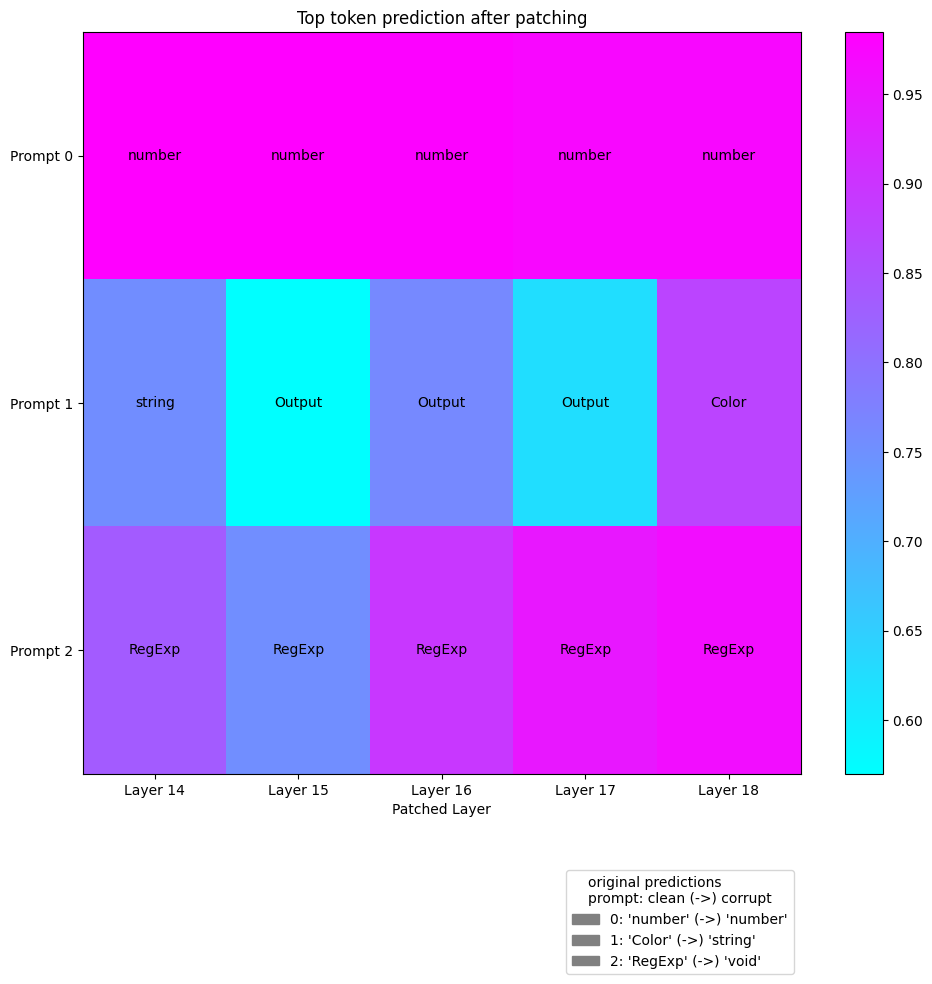

In [32]:
import random
random.seed(11)
correct_prompts = random.sample(correct_prompts, len(correct_prompts))
incorrect_prompts = random.sample(incorrect_prompts, len(incorrect_prompts))
k = range(3)
cleans = [correct_prompts[i][0] for i in k]
corrs = [incorrect_prompts[i][0] for i in k]
incorrect_solns = [incorrect_prompts[i][1] for i in k]
correct_solns = [correct_prompts[i][1] for i in k]
annotations = list(zip(correct_solns, incorrect_solns))
print(incorrect_solns, correct_solns)

patch_l = [14,15,16,17,18]
trace_results = []
for l in tqdm(patch_l):
    trace_res = patch_clean_to_corrupt(model, cleans, corrs, l)
    trace_results.append(trace_res)

patched_heatmap_prediction(model, cleans,corrs, trace_results, patch_l, 
                           figtitle="Top token prediction after patching", 
                           bbox_to_anchor=(1,-0.2), 
                           annotations=annotations, 
                           outfile = f"patched_1b_pred_k{'-'.join([str(a) for a in k])}_l{'-'.join([str(p) for p in patch_l])}.pdf"
                           )

In [51]:
# make a list of correct-incorrect where correct["solution"]==incorrect["solution"]
correct_incorrect = []
for c in tqdm(correct):
    for i in incorrect:
        if c["solution"] == i["solution"]:
            correct_incorrect.append((c,i))

# with open("../data/correct_incorrect.json", "w") as f:
#     json.dump(correct_incorrect, f)

100%|██████████| 2296/2296 [03:48<00:00, 10.04it/s]


In [8]:
with open("../data/results/correct_incorrect.json", "r") as f:
    correct_incorrect = json.load(f)

  0%|          | 0/3 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

/home/franlucc/venvs/gpu/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
100%|██████████| 3/3 [00:37<00:00, 12.47s/it]


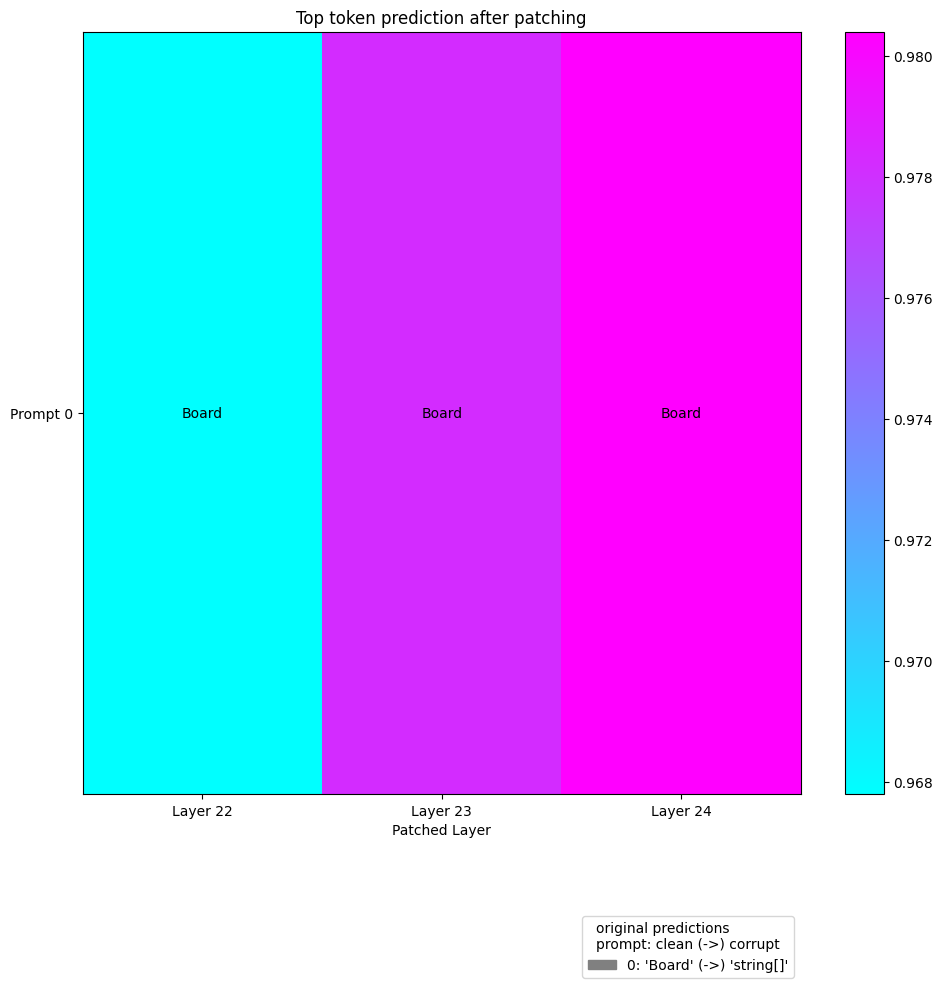

In [9]:
# import random
# seed=0
# random.seed(seed)
# # shuffle
# random.shuffle(correct_incorrect)

k = range(51,52)
cleans = [correct_incorrect[i][0]["prompt"] for i in k]
corrs = [correct_incorrect[i][1]["prompt"] for i in k]
correct_solns = [correct_incorrect[i][0]["solution"] for i in k]
incorrect_gen = [correct_incorrect[i][1]["generated"] for i in k]
annotations = list(zip(correct_solns, incorrect_gen))

patch_l = [22,23,24]
trace_results = []
for l in tqdm(patch_l):
    trace_res = patch_clean_to_corrupt(model, cleans, corrs, l)
    trace_results.append(trace_res)

patched_heatmap_prediction(model, cleans,corrs, trace_results, patch_l, 
                           figtitle="Top token prediction after patching", 
                           bbox_to_anchor=(1,-0.2), 
                           annotations=annotations, 
                           outfile=f"match_patch_3b_{k[0]}_{k[-1]}_layers-{'-'.join(map(str, patch_l))}.pdf"
                           )

## Request patching

In [7]:
from request_patch import *
import random
random.seed(0)
correct_prompts = [c["prompt"] for c in correct]
random.shuffle(correct_prompts)
# avg_tensor = get_averages(model, correct_prompts[:200], STARCODER_FIM.to_list()[:-1], 10)

avg_tensor.shape

Batch:   0%|          | 0/20 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/home/franlucc/venvs/gpu/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
Batch:   0%|          | 0/20 [00:13<?, ?it/s]


KeyboardInterrupt: 

In [8]:
# torch.save(avg_tensor, "_test_3b.pt")
avg_tensor = torch.load("_test_3b.pt")
avg_tensor.shape

torch.Size([36, 2816])

In [9]:
incorrect_prompts = [i for i in incorrect if len(model.tokenizer.tokenize(i["solution"])) == 1]
solns = [i["solution"] for i in incorrect_prompts]

len(incorrect_prompts), len(list(set(solns)))

(330, 52)

In [10]:
unique_files = list(set(files))
unique_types = list(set([i["solution"] for i in incorrect_prompts]))
len(unique_files), len(unique_types)

NameError: name 'files' is not defined

In [11]:
k = [50,52]
# 40, 44
prompts = [i["prompt"] for i in incorrect_prompts[k[0]:k[-1]]]
solns = [i["solution"] for i in incorrect_prompts[k[0]:k[-1]]]
gens = [i["generated"] for i in incorrect_prompts[k[0]:k[-1]]]
solns, gens

(['Q', 'R', 'R'],
 ['Arrow<A, B>\nexport function pipe<A, B, C',
  'A\n\nexport function pipe<A, B, C, D, E',
  'T'])

In [12]:
out = insert_patch(model, prompts, avg_tensor, list(range(16,21)), STARCODER_FIM.to_list()[:-1])
out

OutOfMemoryError: CUDA out of memory. Tried to allocate 54.84 GiB. GPU 3 has a total capacty of 79.11 GiB of which 37.80 GiB is free. Including non-PyTorch memory, this process has 41.30 GiB memory in use. Of the allocated memory 40.10 GiB is allocated by PyTorch, and 628.42 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [11]:
logits : LogitResult = out.decode_logits(prompt_idx=list(range(len(prompts))))
comparison = []
for i,ex in enumerate(incorrect_prompts[k[0]:k[-1]]):
    soln = ex["solution"]
    out_p = logits[-1][i].tokens(model.tokenizer)
    assert len(out_p) == 1
    comparison.append({"solution":soln, "patched":out_p[0], "old":ex["generated"]})
    
print(json.dumps(comparison, indent=2))

[
  {
    "solution": "Arrow",
    "patched": "any",
    "old": "any,\n  ij?: any,\n  jk?: any,\n  kl?:"
  },
  {
    "solution": "Arrow",
    "patched": "any",
    "old": "any,\n  hi?: any\n) {\n  return pipe_(a, ab"
  },
  {
    "solution": "Arrow",
    "patched": ".",
    "old": "any,\n  fg?: any,\n  gh?: any,\n  hi?: any"
  },
  {
    "solution": "Arrow",
    "patched": ".",
    "old": "any,\n  ef?: any,\n  fg?: any,\n  gh?: any"
  }
]


In [21]:
import glob

res = []
for f in glob.glob("../data/results/avg_patching_exp/*.json"):
    with open(f, "r") as f:
        j = json.load(f)
    res += j
    
# assert len(res) == 438, len(res)
# find correct
correct = []
partial_credit = []
anyies = []
for ex in res:
    i = int(ex["i"])
    p = incorrect_prompts[i]["prompt"]
    if ex["patched"] == ex["solution"]:
        correct.append((p,ex))
    elif ex["patched"].lower() == ex["solution"].lower() and ex["solution"].lower() != ex["old"].lower():
        partial_credit.append((p,ex))
    elif ex["solution"] == "any":
        anyies.append((p,ex))
      
ptyp = [j for j in anyies if j[1]["patched"] == "type"]
typ = len(ptyp)
# print(json.dumps(ptyp, indent=2))
print(typ, len(anyies), typ/len(anyies))
print(json.dumps(correct, indent=2))
print(json.dumps(partial_credit, indent=2))
print(json.dumps(anyies, indent=2))
len(correct), len(partial_credit), len(res), len(correct)/len(res), len(partial_credit)/len(res)

IndexError: list index out of range

In [16]:
comparison = []
delta = 1
k = 0
while k+delta < len(incorrect_prompts):
    # do giant loop
    tk = [k, k+delta]
    # 40, 44
    prompts = [i["prompt"] for i in incorrect_prompts[tk[0]:tk[-1]]]
    solns = [i["solution"] for i in incorrect_prompts[tk[0]:tk[-1]]]
    gens = [i["generated"] for i in incorrect_prompts[tk[0]:tk[-1]]]
    out = insert_patch(model, prompts, avg_tensor, list(range(16,23)), STARCODER_FIM.to_list()[:-1])
    logits : LogitResult = out.decode_logits(prompt_idx=list(range(len(prompts))))

    for i,ex in enumerate(incorrect_prompts[tk[0]:tk[-1]]):
        soln = ex["solution"]
        out_p = logits[-1][i].tokens(model.tokenizer)
        assert len(out_p) == 1
        comparison.append({"i":tk[0]+i,"solution":soln, "patched":out_p[0], "old":ex["generated"]})
        
    k += delta
    del(out)
    del(logits)
    
    with open("patched_comparison.json", "w") as f:
        json.dump(comparison, f, indent=4)

KeyboardInterrupt: 

## dataset building

In [3]:
ds = datasets.load_dataset("franlucc/stenotype-eval-dataset", split="train")

In [4]:
f_ds = filter_types_with_idx(ds, QUERY_FUNC_TYPES)
f_ds

Dataset({
    features: ['hexsha', 'size', 'ext', 'lang', 'max_stars_repo_path', 'max_stars_repo_name', 'max_stars_repo_head_hexsha', 'max_stars_repo_licenses', 'max_stars_count', 'max_stars_repo_stars_event_min_datetime', 'max_stars_repo_stars_event_max_datetime', 'max_issues_repo_path', 'max_issues_repo_name', 'max_issues_repo_head_hexsha', 'max_issues_repo_licenses', 'max_issues_count', 'max_issues_repo_issues_event_min_datetime', 'max_issues_repo_issues_event_max_datetime', 'max_forks_repo_path', 'max_forks_repo_name', 'max_forks_repo_head_hexsha', 'max_forks_repo_licenses', 'max_forks_count', 'max_forks_repo_forks_event_min_datetime', 'max_forks_repo_forks_event_max_datetime', 'content', 'avg_line_length', 'max_line_length', 'alphanum_fraction', 'annotation_sites', 'type_definitions', 'loc', 'functions', 'loc_per_function', 'estimated_tokens', 'fim_program', 'fim_type'],
    num_rows: 5370
})

In [5]:
i = 0
print(f_ds[i]["fim_program"])
print(f_ds[i]["fim_type"])

/*
 * @Author: your name
 * @Date: 2022-04-24 10:11:23
 * @LastEditTime: 2022-04-24 16:14:52
 * @LastEditors: Please set LastEditors
 * @Description: 打开koroFileHeader查看配置 进行设置: https://github.com/OBKoro1/koro1FileHeader/wiki/%E9%85%8D%E7%BD%AE
 * @FilePath: /tinkerbell-ui-react/src/packages/DaysPicker/date/interface.ts
 */
//  props 天
export interface dayProps {
    year: number;
    month: number;
    active: number;
    change: Function;
    visible: boolean;
    monthRef: any;
    show: boolean;
    limit: boolean;
}
//  props 月
export interface monthProps {
    visible: boolean;
    active: number;
    change: Function;
    year: number;
    plateChange: Function;
    limit: boolean;
}
//  props 年
export interface yearProps {
    visible: boolean;
    active: number;
    change: Function;
    plateChange: Function;
    limit: boolean;
}

// pageday-item type
export type dayItem = {
    label: string;
    value: number;
    disabled: boolean; //禁用
    prev: boolean; // 是否属于上一月份
    

In [7]:
f_ds.push_to_hub("franlucc/stenotype-eval-dataset-func-type-stripped-v3")

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
f_ds_v0 = datasets.load_dataset("franlucc/stenotype-eval-func-type-stripped-v1", split="train")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/336 [00:00<?, ? examples/s]

In [9]:
count = 0
diffs = []
lens = []
for i in range(len(f_ds)):
    a =f_ds[i]["content_type_removed"]
    b=f_ds_v0[i]["content_type_removed"]
    if a != b:
        count += 1
        diffs.append((i,a, b))
        lens.append(len(a) - len(b))
        
count

0

In [25]:
ds = datasets.load_dataset("franlucc/stenotype-eval-dataset-func-type-stripped-v3", split="train")


In [26]:
fixds = ds.map(lambda x: {**x, "fim_type": json.loads(x["fim_type"]).strip()})

Map:   0%|          | 0/5370 [00:00<?, ? examples/s]

In [27]:
ds[3]["fim_type"]

'"number"'

In [28]:
fixds[3]["fim_type"]

'number'

In [33]:
fixds2.push_to_hub("franlucc/stenotype-eval-dataset-func-type-stripped-v4")

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
fixds2 = fixds.filter(lambda x: "<FILL>" in x["fim_program"])

Filter:   0%|          | 0/5370 [00:00<?, ? examples/s]

In [34]:
fixds2[2019]["fim_type"]

'"top" | "right" | "bottom" | "left"'